In [1]:
!pip list

Package            Version
------------------ -----------
asttokens          2.4.1
certifi            2024.8.30
charset-normalizer 3.4.0
colorama           0.4.6
comm               0.2.2
contourpy          1.3.0
cycler             0.12.1
DateTime           5.5
debugpy            1.8.5
decorator          5.1.1
executing          2.1.0
fonttools          4.54.1
idna               3.10
ipykernel          6.29.5
ipython            8.27.0
jedi               0.19.1
joblib             1.4.2
jupyter_client     8.6.2
jupyter_core       5.7.2
kiwisolver         1.4.7
matplotlib         3.9.2
matplotlib-inline  0.1.7
nest-asyncio       1.6.0
numpy              2.1.1
oauthlib           3.2.2
packaging          24.1
pandas             2.2.2
parso              0.8.4
path               17.0.0
pillow             10.4.0
pip                24.3.1
platformdirs       4.3.2
prompt_toolkit     3.0.47
psutil             6.0.0
pure_eval          0.2.3
Pygments           2.18.0
pyparsing          3.1.4
python-

## Configurações iniciais

In [ ]:
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
import torch.nn as nn
import seaborn as sns
import numpy as np
import torchvision
import random
import torch

import os

def set_seed(seed=1234):

    random.seed(seed)
    os.environ['PYHTONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

set_seed()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
!nvidia-smi

Tue Nov  5 21:43:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# O que é o PyTorch?

In [ ]:
tensor = torch.tensor(1)
print(tensor)

tensor(1)


In [ ]:
tensor = torch.tensor(55)
print(tensor)

tensor(55)


In [ ]:
tensor = torch.tensor([1,2,3])
print(tensor)
print(tensor.shape)

tensor([1, 2, 3])
torch.Size([3])


In [ ]:
tensor = torch.tensor([[1,2,3], [4,5,6]])
print(tensor)
print(tensor.shape)

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])


In [ ]:
matx1 = torch.randn([3,3])
matx2 = torch.randn([3,3])
print(matx1)
print()
print(matx2)

tensor([[ 0.0461,  0.4024, -1.0115],
        [ 0.2167, -0.6123,  0.5036],
        [ 0.2310,  0.6931, -0.2669]])

tensor([[ 2.1785,  0.1021, -0.2590],
        [-0.1549, -1.3706, -0.1319],
        [ 0.8848, -0.2611,  0.6104]])


In [ ]:
matx1 + matx2

tensor([[ 2.2246,  0.5045, -1.2705],
        [ 0.0618, -1.9829,  0.3717],
        [ 1.1158,  0.4320,  0.3436]])

In [ ]:
matx1 * matx2

tensor([[ 0.1005,  0.0411,  0.2620],
        [-0.0336,  0.8392, -0.0664],
        [ 0.2044, -0.1809, -0.1629]])

In [ ]:
torch.mm(matx1, matx2)

tensor([[-0.8569, -0.2827, -0.6825],
        [ 1.0126,  0.7298,  0.3320],
        [ 0.1597, -0.8567, -0.3141]])

In [ ]:
x = torch.tensor(3.0, requires_grad=True)
y = x**2
y.backward()
print(x.grad)

tensor(6.)


In [ ]:
x = torch.tensor(3.0, requires_grad=True)
y = x+2
y.backward()
print(x.grad)

tensor(1.)


In [ ]:
# matrix multiplication of a big matrix and compare time between gpu and cpu without timeit
x = torch.randn([1000,1000])
y = torch.randn([1000,1000])
%timeit torch.mm(x,y)

x = x.to('cuda')
y = y.to('cuda')
%timeit torch.mm(x,y)

23.1 ms ± 7.69 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
599 µs ± 16.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Preparando o Dataset

In [ ]:
# download dataset
! pip install gdown
! gdown --id 17zbLsM4n1QQJutNncsAaSRFj4uJVELak
!unzip /content/dataset.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=17zbLsM4n1QQJutNncsAaSRFj4uJVELak
From (redirected): https://drive.google.com/uc?id=17zbLsM4n1QQJutNncsAaSRFj4uJVELak&confirm=t&uuid=e8d3c4d2-99ae-4d9a-b0bd-65eb8c6c05e4
To: /content/dataset.zip
100% 67.6M/67.6M [00:02<00:00, 28.6MB/s]
Archive:  /content/dataset.zip
  inflating: test/cats/cat_1.jpg     
  inflating: test/cats/cat_106.jpg   
  inflating: test/cats/cat_109.jpg   
  inflating: test/cats/cat_113.jpg   
  inflating: test/cats/cat_114.jpg   
  inflating: test/cats/cat_116.jpg   
  inflating: test/cats/cat_118.jpg   
  inflating: test/cats/cat_119.jpg   
  inflating: test/cats/cat_124.jpg   
  inflating: test/cats/cat_140.jpg   
  inflating: test/cats/cat_147.jpg   
  inflating: test/cats/cat_156.

In [ ]:
img_size = (256,256)
transformations = transforms.Compose([transforms.Resize(img_size), transforms.ToTensor()])

train = datasets.ImageFolder('./train',transform=transformations)
test= datasets.ImageFolder('./test', transform=transformations)
trainloader = DataLoader(train, batch_size=64, shuffle=True)
testloader = DataLoader(test, batch_size=64, shuffle=False)

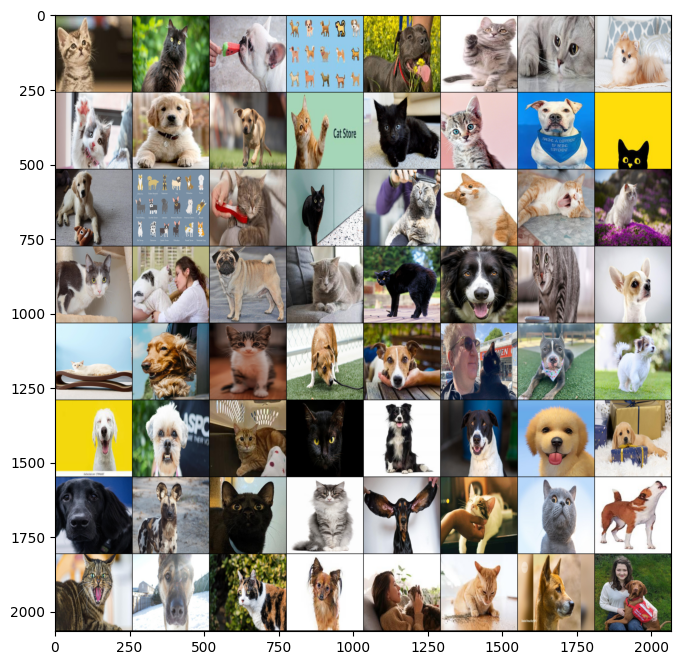

In [ ]:
def imshow(img):
    plt.figure(figsize=(20,8))
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images = next(dataiter)
imshow(torchvision.utils.make_grid(images[0]))

# Criando uma MLP

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            # input = (256,256,3)
            nn.Flatten(), # (196608)
            nn.Linear(256*256*3, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 64),
            nn.ReLU(inplace=True),
            nn.Linear(64,2)
        )

    def forward(self, x):
        x = self.layers(x)
        return x

In [ ]:
def validation(model, loader, criterion):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    return val_loss / len(loader)

def train(model, trainloader, testloader, optimizer, criterion, epochs):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in tqdm(trainloader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        val_loss = validation(model, testloader, criterion)
        print(f'Epoch: {epoch + 1} | Training Loss: {running_loss / len(trainloader):.4f} | Validation Loss: {val_loss:.4f}')

def accuracy(model, loader):
    model.eval()
    corrected = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            corrected += (predicted == labels).sum().item()
    return (corrected / total) * 100

def confusion_matrix(model, loader):
    model.eval()
    num_classes = 2
    confusion_matrix = torch.zeros(num_classes, num_classes)
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            for true, pred in zip(labels, predicted):
                confusion_matrix[true.item(), pred.item()] += 1

    confusion_matrix = confusion_matrix.cpu().numpy()
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g',
                     xticklabels=['Gato', 'Cachorro'], yticklabels=['Gato', 'Cachorro'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.title("Confusion Matrix")
    plt.show()
    return ax

In [ ]:
mlp = MLP().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(mlp.parameters(), lr=0.0001)
epochs = 3

In [ ]:
train(mlp, trainloader, testloader, optimizer, criterion, epochs)

100%|██████████| 9/9 [00:14<00:00,  1.57s/it]


Epoch: 1 | Training Loss: 1.7746 | Validation Loss: 0.7555


100%|██████████| 9/9 [00:07<00:00,  1.16it/s]


Epoch: 2 | Training Loss: 1.2126 | Validation Loss: 0.8074


100%|██████████| 9/9 [00:07<00:00,  1.26it/s]


Epoch: 3 | Training Loss: 0.9982 | Validation Loss: 1.0571


A rede atinge: 51.42857142857142% de acurácia


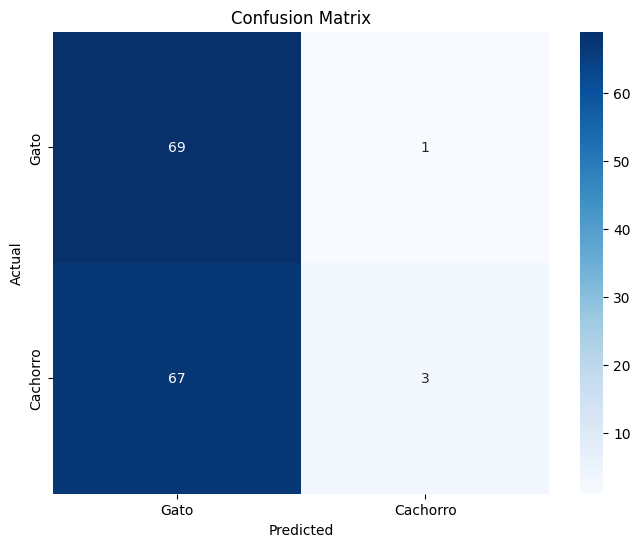

In [ ]:
print(f'A rede atinge: {accuracy(mlp, testloader)}% de acurácia')
conf_mat = confusion_matrix(mlp, testloader)

# Criando uma Rede Neural Convolucional

In [ ]:
class ConvolutionalNeuralNetwork(nn.Module):
    def __init__(self):
        super(ConvolutionalNeuralNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),  # Output: (256, 256, 32)
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: (128, 128, 32)

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # Output: (128, 128, 64)
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: (64, 64, 64)

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),  # Output: (64, 64, 128)
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: (32, 32, 128)

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),  # Output: (32, 32, 256)
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: (16, 16, 256)

            nn.Flatten(),  # Output: (16 * 16 * 256 = 65536)
            # Fully Connected Layers
            nn.Linear(16 * 16 * 256, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),

            nn.Linear(256, 2)  # Final output layer with 2 classes
        )

    def forward(self, x):
        x = self.layers(x)
        return x

In [ ]:
cnn = ConvolutionalNeuralNetwork().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(cnn.parameters(), lr=0.0001)
epochs = 3

In [ ]:
train(cnn, trainloader, testloader, optimizer, criterion, epochs)

100%|██████████| 9/9 [00:10<00:00,  1.20s/it]


Epoch: 1 | Training Loss: 1.2422 | Validation Loss: 0.7192


100%|██████████| 9/9 [00:09<00:00,  1.08s/it]


Epoch: 2 | Training Loss: 0.6269 | Validation Loss: 0.7530


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


Epoch: 3 | Training Loss: 0.5653 | Validation Loss: 0.8081


A rede atinge: 50.71428571428571% de acurácia


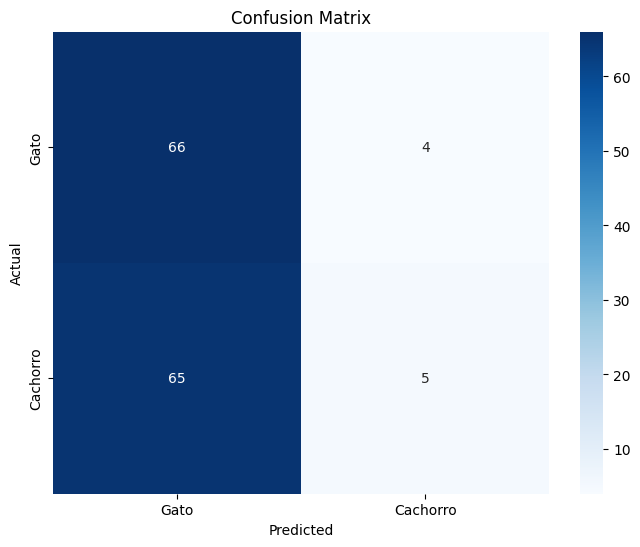

In [ ]:
print(f'A rede atinge: {accuracy(cnn, testloader)}% de acurácia')
conf_mat = confusion_matrix(cnn, testloader)

# Transfer Learning

In [ ]:
resnet = torchvision.models.resnet50(weights = torchvision.models.ResNet50_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 184MB/s]


In [ ]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# substituímos a última camada da rede para resolver o nosso problema de classificação
resnet.fc = nn.Linear(2048,2)

In [ ]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# "congelamos os pesos das camadas, exceto a última"
for name, params in resnet.named_parameters():
    if name not in ('fc.weight', 'fc.bias'):
        params.requires_grad = False
# for name, params in resnet.named_parameters():
#     print(name, params.requires_grad)

In [ ]:
resnet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.001)
epochs = 3

In [ ]:
train(resnet, trainloader, testloader, optimizer, criterion, epochs)

100%|██████████| 9/9 [00:10<00:00,  1.13s/it]


Epoch: 1 | Training Loss: 0.5265 | Validation Loss: 0.3992


100%|██████████| 9/9 [00:08<00:00,  1.00it/s]


Epoch: 2 | Training Loss: 0.3150 | Validation Loss: 0.2958


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


Epoch: 3 | Training Loss: 0.2118 | Validation Loss: 0.2414


A rede atinge: 95.0% de acurácia


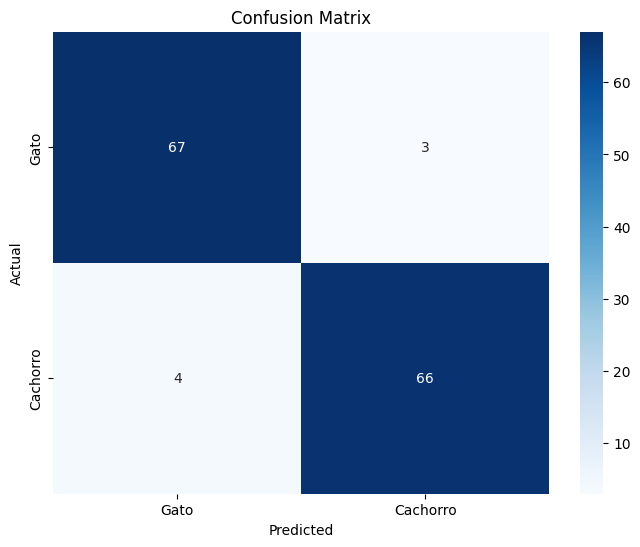

In [ ]:
print(f'A rede atinge: {accuracy(resnet, testloader)}% de acurácia')
conf_mat = confusion_matrix(resnet, testloader)

# Comparando os Modelos

In [ ]:
def predict(model, image):
    prediction = model(torch.unsqueeze(image, 0).to(device))
    result = torch.argmax(prediction)
    return 'Cat' if result == 0 else 'Dog'

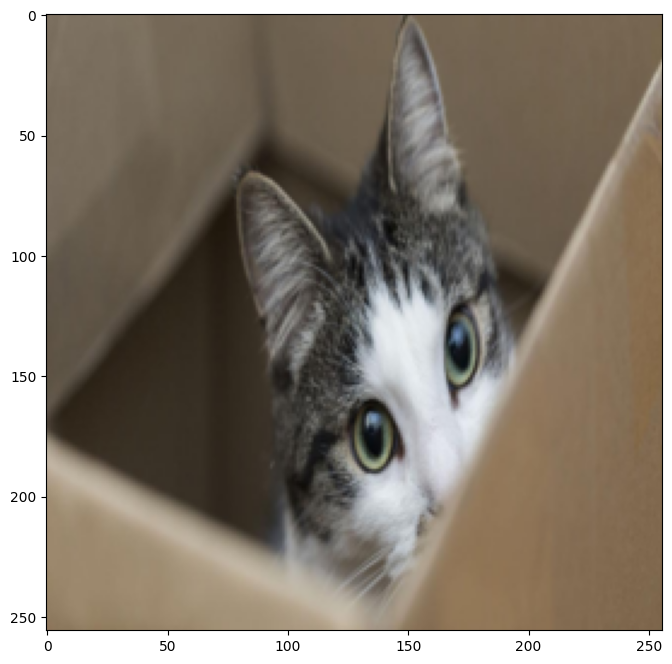

Cat


In [ ]:
image_index = 20
image = test[image_index][0]
label = 'Dog' if test[image_index][1] else 'Cat'
imshow(image)
print(label)

In [ ]:
print(f'Real Label: {label}')
print(f'MLP Prediction: {predict(mlp, image)}')
print(f'CNN Prediction: {predict(cnn, image)}')
print(f'Resnet Prediction: {predict(resnet, image)}')

Real Label: Cat
MLP Prediction: Cat
CNN Prediction: Cat
Resnet Prediction: Cat


# Teste sua imagem!

In [ ]:
from PIL import Image
import torchvision.transforms.functional as TF

x = Image.open('caramelo.jpg').convert('RGB')
x = transformations(x)

FileNotFoundError: [Errno 2] No such file or directory: '/content/caramelo.jpg'

In [ ]:
print(f'MLP Prediction: {predict(mlp, x)}')
print(f'CNN Prediction: {predict(cnn, x)}')
print(f'Resnet Prediction: {predict(resnet, x)}')